   # French industry


#1 Data description:

- The first table provides information on the number of companies in each French city, classified by size.

- The second table contains geographical data on French cities, mainly including latitude and longitude, as well as codes and names of regions/departments.

- The third table presents salaries per town in France categorized by job categories, age, and gender.

- The fourth table includes demographic information about cities, including age, gender, and lifestyle.

In [1]:
# Libraries imported.

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
sns.set()

# Pivotal dataframes.

df1 = pd.read_csv('desktop/data/french_industry-2/base_etablissement_par_tranche_effectif.csv')
df2 = pd.read_csv('desktop/data/french_industry-2/name_geographic_information.csv')
df3 = pd.read_csv('desktop/data/french_industry-2/net_salary_per_town_categories.csv')
df4 = pd.read_csv('desktop/data/french_industry-2/population.csv',low_memory = False)

In [2]:
# First dataframe; df1: renaming, cleaning and selecting interesting variables.

df1["small_business"] = df1["E14TS0ND"] +  df1["E14TS1"]+  df1["E14TS6"]
df1["middle_business"] = df1["E14TS10"] +  df1["E14TS20"]+  df1["E14TS50"]
df1["big_business"] = df1["E14TS100"] +  df1["E14TS200"]+  df1["E14TS500"]
df1 = df1.iloc[:,[0,1,2,3,4,14,15,16]]
df1["DEP"]= df1["DEP"].str.replace('A', '0', regex = True)
df1["DEP"]= df1["DEP"].str.replace('B', '0', regex = True)
df1["DEP"] = df1["DEP"].astype(int)
df1.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,small_business,middle_business,big_business
0,01001,L'Abergement-Clémenciat,82,1,25,25,0,0
1,01002,L'Abergement-de-Varey,82,1,10,10,0,0
2,01004,Ambérieu-en-Bugey,82,1,996,912,79,5
3,01005,Ambérieux-en-Dombes,82,1,99,96,3,0
4,01006,Ambléon,82,1,4,4,0,0


* Results:

1) Three new columns (small_business), (middle_business), (big_business) are created.The "Small Business" column encompasses all businesses with 1 to 9 employees.The "Middle Business" column encompasses all businesses with 10 to 99 employees.The "Large Business" column encompasses all businesses with 100 to 500 employees

In [3]:
# Second dataframe; df2 table: renaming, cleaning and selecting interesting variables.

df2 = df2.rename({"chef.lieu_région":"LIBGEO"}, axis= 1)
df2 = df2.iloc[:,[1,3,11,12,13]]
df2["longitude"]= df2["longitude"].str.replace(',', '.', regex = True)
df2["longitude"]= df2["longitude"].replace('-' , np.NaN )
df2["longitude"]=df2["longitude"].astype(float)
df2= df2.dropna()
df2.head()

,code_région,LIBGEO,latitude,longitude,éloignement
0,82,Lyon,46.283333,5.166667,1.21
1,82,Lyon,46.400000,5.266667,1.91
2,82,Lyon,46.333333,5.283333,1.51
3,82,Lyon,46.366667,5.050000,1.71
4,82,Lyon,46.133333,5.400000,1.01


* Aimining to find a shared key to merge dataframes in preparation for the ML modelling, "chef.lieu_région" is renamed as"LIBGEO".

In [4]:
# Third dataframe; df3 table: renaming, cleaning and selecting interesting variables.

df3 = df3.iloc[: ,[1,2,3,4,5,7,12]]
re_name2= {"SNHM14":"average_salary" , "SNHMF14": "f_average_salary" , "SNHMH14": "m_average_salary",
           "SNHMC14":"avg_sal_executivs","SNHMP14":"avg_sal_mid_manager","SNHME14":"avg_sal_emp"}
df3= df3.rename(re_name2 , axis = 1 )
df3.head()

,LIBGEO,average_salary,avg_sal_executivs,avg_sal_mid_manager,avg_sal_emp,f_average_salary,m_average_salary
0,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.6,15.0
1,Ambronay,13.5,22.1,14.7,10.7,11.9,14.7
2,Arbent,13.5,27.6,15.6,11.1,10.9,15.3
3,Attignat,12.9,21.8,14.1,11.0,11.4,13.8
4,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.6,13.8


In [5]:
# Fourth dataframe; df4 table: renaming, cleaning and selecting interesting variables.

#df4=df4.iloc[:,[2,3,4,5,6]]
df4 = df4.rename({"MOCO":"Individual_stu","AGEQ80_17":"Age","SEXE": "Gender"}, axis= 1)
df4 = df4.drop_duplicates(keep = "first")
df4.head()

,NIVGEO,CODGEO,LIBGEO,Individual_stu,Age,Gender,NB
0,COM,01001,L'Abergement-Clémenciat,11,0,1,15
1,COM,01001,L'Abergement-Clémenciat,11,0,2,15
2,COM,01001,L'Abergement-Clémenciat,11,5,1,20
3,COM,01001,L'Abergement-Clémenciat,11,5,2,20
4,COM,01001,L'Abergement-Clémenciat,11,10,1,20


# Creation of the new 'french_industry' dataframe.

In [6]:
# Merging df1 and df3 (+columns rename)

from functools import reduce
dfm = [df1,df3]
french_industry= reduce(lambda  left,right: pd.merge(left,right,on=['LIBGEO'],how='inner'), dfm)
french_industry= french_industry.rename({"LIBGEO":"City" ,"E14TST": "Total_business"} ,  axis = 1 )
french_industry.head()

,CODGEO,City,REG,DEP,Total_business,small_business,middle_business,big_business,average_salary,avg_sal_executivs,avg_sal_mid_manager,avg_sal_emp,f_average_salary,m_average_salary
0,01004,Ambérieu-en-Bugey,82,1,996,912,79,5,13.7,24.2,15.5,10.3,11.6,15.0
1,01007,Ambronay,82,1,124,117,7,0,13.5,22.1,14.7,10.7,11.9,14.7
2,01014,Arbent,82,1,314,260,49,5,13.5,27.6,15.6,11.1,10.9,15.3
3,01024,Attignat,82,1,116,111,2,3,12.9,21.8,14.1,11.0,11.4,13.8
4,01025,Bâgé-la-Ville,82,1,101,98,3,0,13.0,22.8,14.1,10.5,11.6,13.8


In [7]:
# Describing numerical variables from the merged "french_industry" dataframe.

french_industry.describe().round(2)

,REG,DEP,Total_business,small_business,middle_business,big_business,average_salary,avg_sal_executivs,avg_sal_mid_manager,avg_sal_emp,f_average_salary,m_average_salary
count,6044.00,6044.00,6044.00,6044.00,6044.00,6044.00,6044.00,6044.00,6044.00,6044.00,6044.00,6044.00
mean,51.12,66.56,633.97,593.56,37.25,3.16,13.69,23.71,14.58,10.57,12.04,14.82
std,27.28,124.27,5777.46,5506.90,252.66,21.23,2.53,2.80,1.43,0.81,1.78,3.13
min,1.00,1.00,0.00,0.00,0.00,0.00,10.20,16.00,11.60,8.70,9.30,10.40
25%,25.00,31.00,117.00,109.75,4.00,0.00,12.10,21.90,13.80,10.00,10.90,12.90
50%,52.00,54.00,215.00,200.00,12.00,1.00,13.00,23.30,14.40,10.40,11.50,14.00
75%,82.00,73.00,443.00,408.00,29.00,2.00,14.40,24.90,15.10,10.90,12.70,15.70
max,94.00,974.00,427385.00,407807.00,18130.00,1448.00,43.30,51.50,54.60,17.50,26.70,52.40


* Observations: 

1) The mean and median are close in all columns except for total and small businesses.

2) There is a notable difference between the maximum and minimum values for total businesses and average salary.

In [8]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(french_industry.columns):
    variables.loc[i] = [var, french_industry[var].nunique(),french_industry[var].unique().tolist()]
variables.reset_index()    
variables

,Variable,Number of unique values,Values
0,CODGEO,5813,"[01004, 01007, 01014, 01024, 01025, 01027, 080..."
1,City,5079,"[Ambérieu-en-Bugey, Ambronay, Arbent, Attignat..."
2,REG,26,"[82, 21, 73, 43, 26, 22, 53, 93, 91, 54, 4, 74..."
3,DEP,99,"[1, 8, 81, 25, 58, 69, 80, 26, 22, 31, 4, 11, ..."
4,Total_business,1416,"[996, 124, 314, 116, 101, 109, 78, 252, 177, 6..."
5,small_business,1354,"[912, 117, 260, 111, 98, 99, 72, 216, 154, 612..."
6,middle_business,315,"[79, 7, 49, 2, 3, 8, 6, 33, 23, 41, 51, 43, 13..."
7,big_business,84,"[5, 0, 3, 2, 1, 23, 7, 6, 4, 15, 8, 10, 13, 17..."
8,average_salary,167,"[13.7, 13.5, 12.9, 13.0, 13.9, 12.4, 14.0, 11...."
9,avg_sal_executivs,202,"[24.2, 22.1, 27.6, 21.8, 22.8, 22.2, 24.0, 23...."


* Observations:

1) The number of cities is a 5076 .

2) The number of regions is 26 .

3) The number of departments is 99.

4) There are 167 unique values for salary.

# Data Visualization:

1) Using the 'city_with_high_business' metric, the objective is to identify the top ten French cities that host the highest number of businesses.

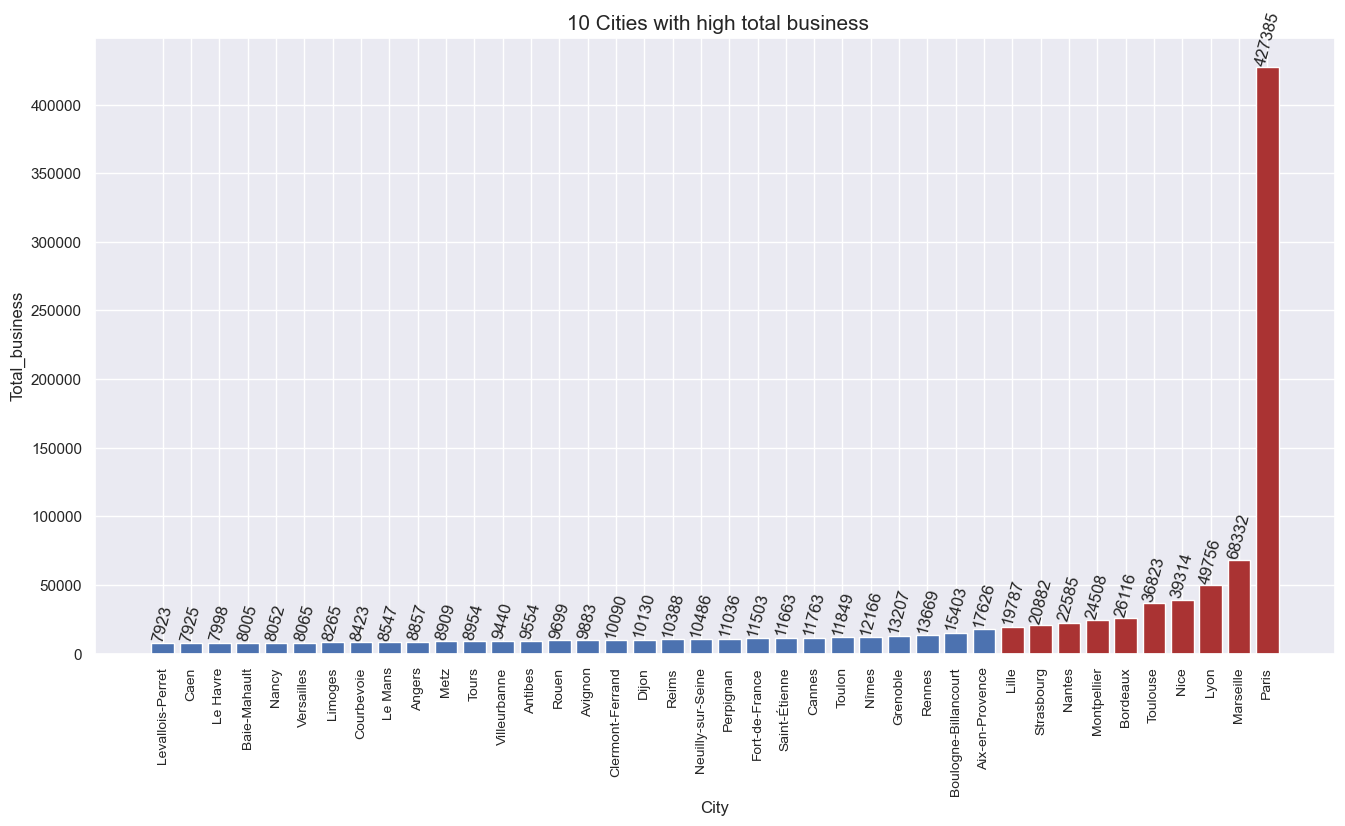

In [9]:
city_with_hight_business = french_industry.groupby('City')['Total_business'].mean().round().sort_values( ascending = False)[:40]
city_with_hight_business = city_with_hight_business.reset_index()
def barplot_Top_10_cities(df,X,Y,xlabel,ylabel,N,title):
    df=df.sort_values(Y,ascending= True)
    df=df[df[Y]> 0]
    n = list(df[X])
    s = list(df[Y].astype(int))
    plt.figure(figsize=(16, 8))
    plt.xticks(rotation= 90, fontsize=10);
    ax = plt.bar(n,s)
    plt.title(title,fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i in range(len(s)):
        plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom',rotation=75)
    for i in range(len(s)-N,len(s)):
        ax.patches[i].set_facecolor('#aa3333')
    plt.show()
    
    return  n[len(n)-N-1:]
best_10= barplot_Top_10_cities(city_with_hight_business,'City','Total_business','City','Total_business',
                                10,' 10 Cities with high total business')

* Results: 

1) Paris , Marseille , Lyon , Nice , Toulouse , Bordeaux , Montpellier , Nantes , Strasbourg ,Lille are the top ten.

2) Paris host the highest number of businesses; 427,385.

* Observation:

- Paris itself host more businesses tahn the sum of the rest top 9 cities. 

2) Looking at the 'Top_cities', the goal is to check how different variables are represented within the Top 10 business cities in France.

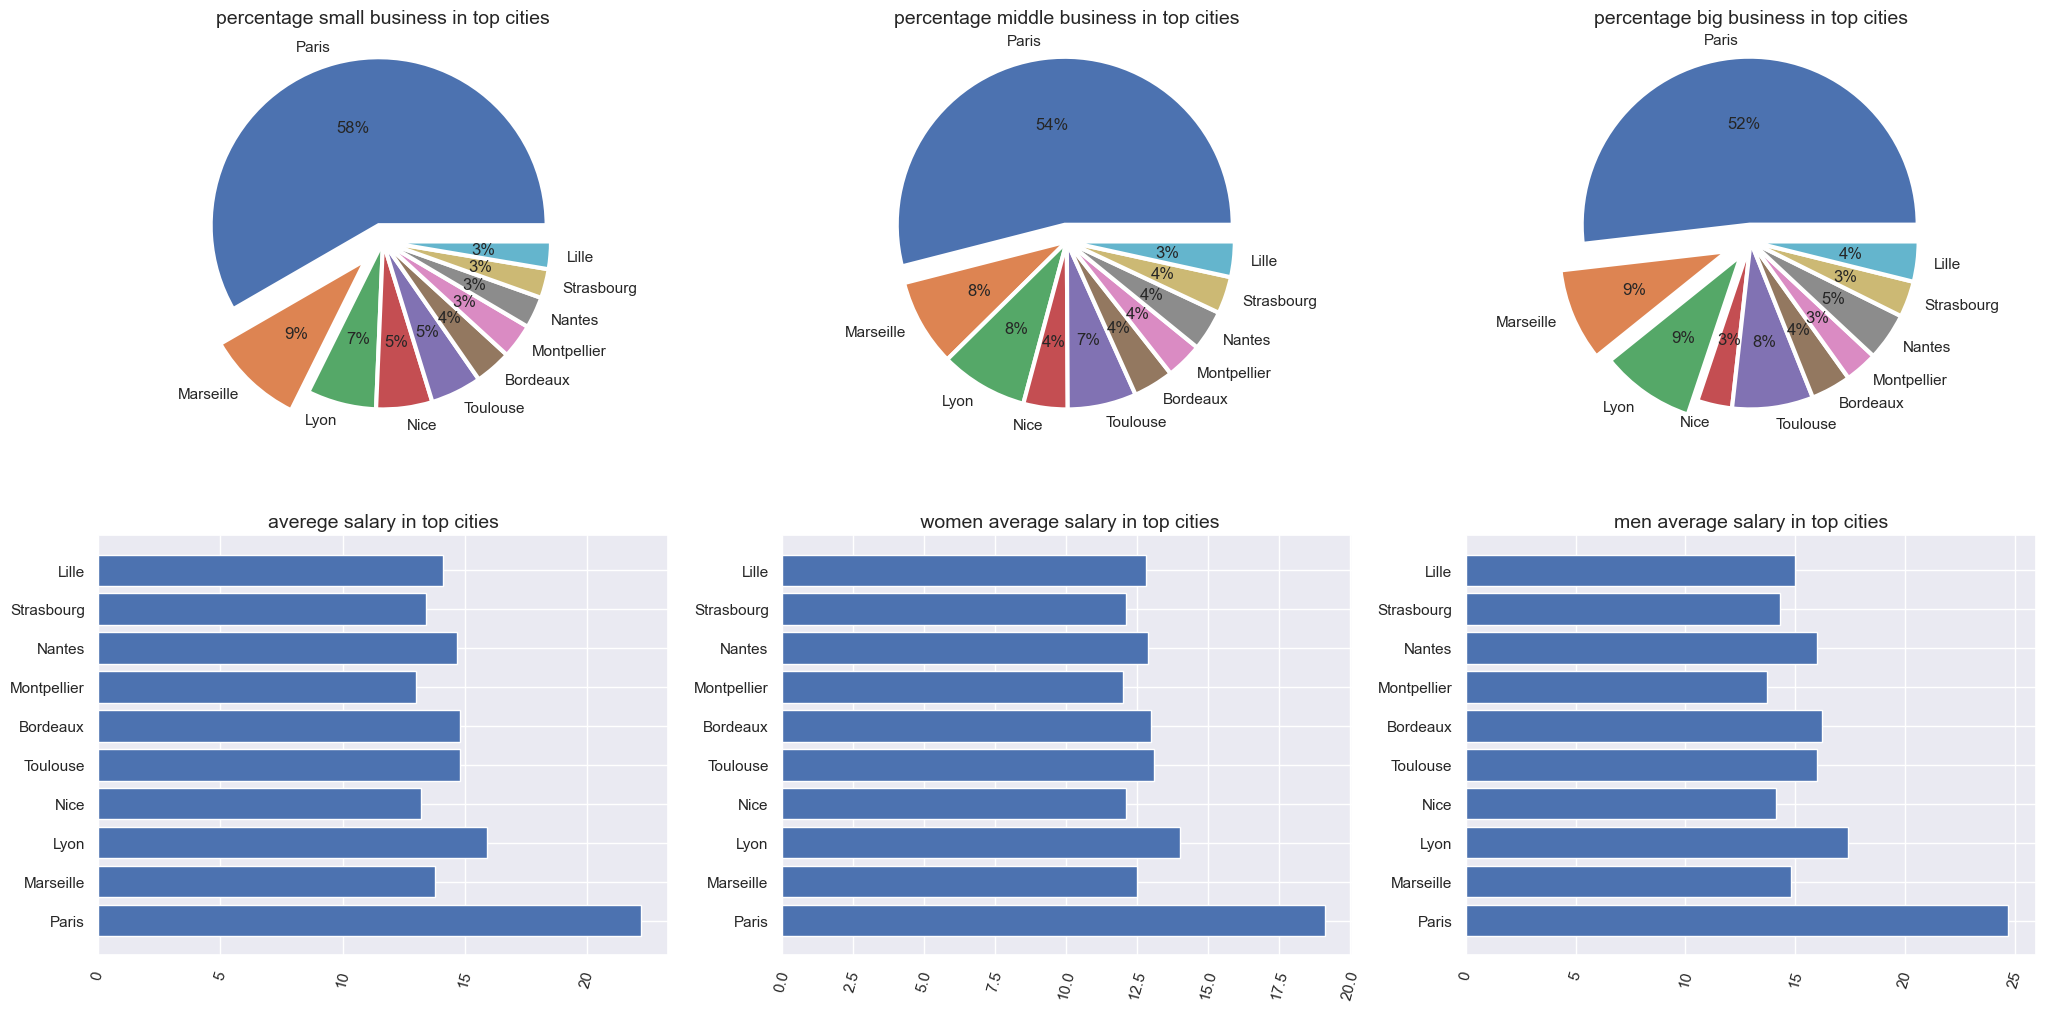

In [10]:
Top_Cities = french_industry.groupby('City')[['small_business','middle_business','big_business','average_salary','f_average_salary','m_average_salary']].mean().round(2).sort_values(by = 'small_business', ascending = False)[:10]
Top_Cities= Top_Cities.reset_index()
Top_Cities

fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(25,12))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=75)
axs[0,0].pie(x=Top_Cities ['small_business'], autopct="%.f%%",labels =Top_Cities['City'],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'} , explode=(0.1, 0.15, 0, 0,0, 0, 0, 0,0, 0));
axs[0,1].pie(x=Top_Cities ['middle_business'], autopct="%.f%%",labels =Top_Cities['City'],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, explode=(0.1, 0, 0, 0,0, 0, 0, 0,0, 0));
axs[0,2].pie(x=Top_Cities['big_business'], autopct="%.f%%",labels =Top_Cities['City'],wedgeprops={'linewidth': 3.0,'edgecolor': 'white'}, explode=(0.1, 0.15, 0.1, 0,0, 0, 0, 0,0, 0));

axs[0,1].set_title("percentage middle business in top cities", fontsize=14,loc = 'center');
axs[0,0].set_title("percentage small business in top cities", fontsize=14,loc = 'center');
axs[0,2].set_title("percentage big business in top cities", fontsize=14,loc = 'center');

#axs[1,0].pie(x=Top_Cities ['average_salary'], autopct="%.f%%",labels =Top_Cities['City'],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, explode=(0.1, 0, 0.1, 0,0, 0, 0, 0,0, 0));
#axs[1,1].pie(x=Top_Cities ['f_average_salary'], autopct="%.f%%",labels =Top_Cities['City'],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, explode=(0.1, 0, 0.1, 0,0, 0, 0, 0,0, 0));
#axs[1,2].pie(x=Top_Cities['m_average_salary'], autopct="%.f%%",labels =Top_Cities['City'],wedgeprops={'linewidth': 3.0,'edgecolor': 'white'}, explode=(0.1, 0, 0.1, 0,0, 0, 0, 0.1,0, 0));

axs[1,0].barh(list(Top_Cities['City']),list(Top_Cities['average_salary']))
axs[1,1].barh(list(Top_Cities['City']),list(Top_Cities['f_average_salary']))
axs[1,2].barh(list(Top_Cities['City']),list(Top_Cities['m_average_salary']))

             
axs[1,0].set_title("averege salary in top cities", fontsize=14,loc = 'center');
axs[1,1].set_title(" women average salary in top cities", fontsize=14,loc = 'center');
axs[1,2].set_title("men average salary in top cities", fontsize=14,loc = 'center');

* Results : 

1) The percentage of small businesses, at 58%, is highest in Paris, followed by Marseille at 9% and Lyon at 7%.

2) The percentage of middle-sized businesses, at 54%, is highest in Paris, followed by Marseille and Lyon at 8%.

3) Among big businesses, the highest percentage, 52%, is found in Paris, followed by Marseille and Lyon at 9%.

4) The percentage of average salary, at 15%, is highest in Paris, followed by Lyon at 11% and Nantes at 10%.

5) For women's average salary, the highest percentage of 14% is in Paris, followed by Lyon, Toulouse, Bordeaux, and Nantes at 10%.

6) Men's average salary, at 15%, is highest in Paris, followed by Lyon at 11%, and Toulouse, Bordeaux, and Nantes at 10%.

* Observations:

- It's important to note that this percentage of average salaries is calculated only for the top cities with the largest number of total businesses, not for all cities and communes.

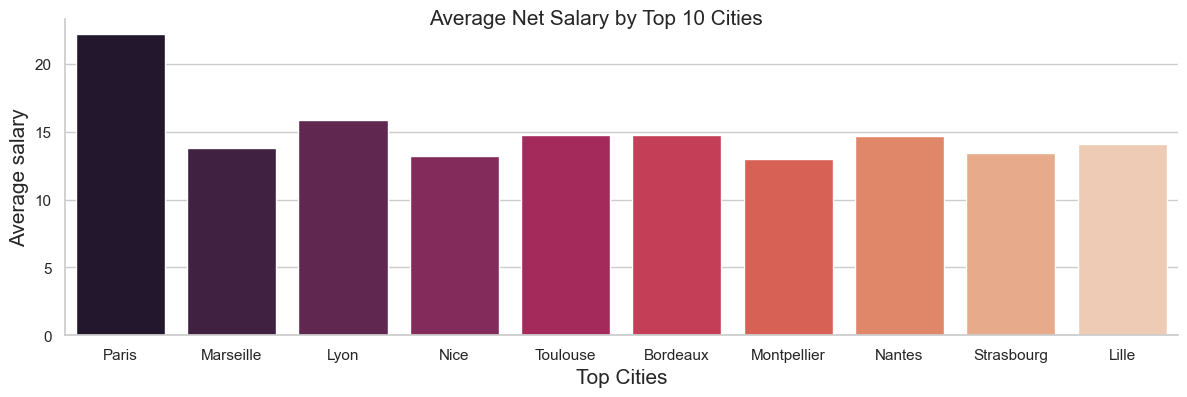

In [11]:

sns.set(style='whitegrid')
sns.catplot(x = 'City', y = 'average_salary', kind = 'bar', height = 4, aspect = 3,
            palette = "rocket",
            data = Top_Cities).fig.suptitle("Average Net Salary by Top 10 Cities",fontsize=15);
plt.xlabel('Top Cities', fontsize=15)
plt.ylabel('Average salary', fontsize=15)
plt.show()

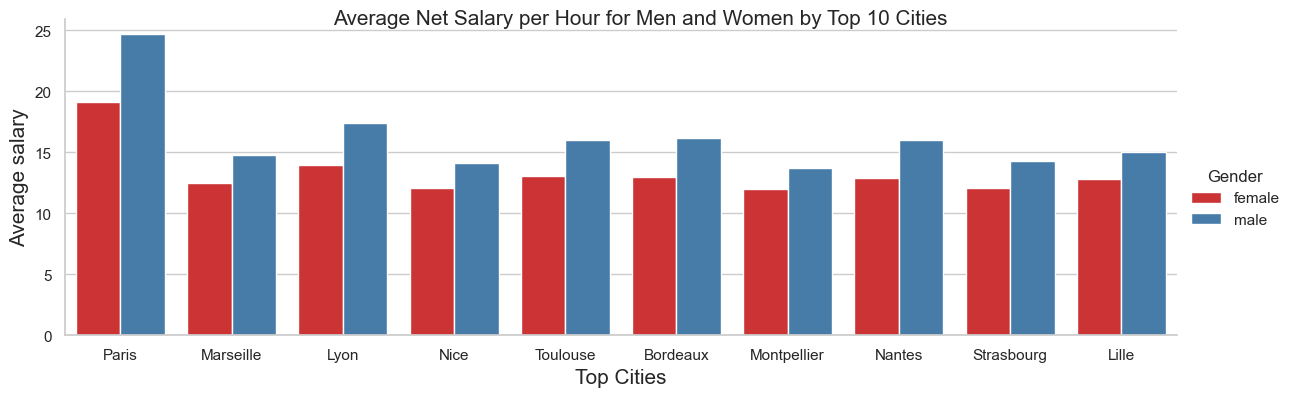

In [12]:
Top_Cities_m= Top_Cities[["City", "m_average_salary"]]
Top_Cities_m = Top_Cities_m.rename({"m_average_salary": "avrage_salary"}, axis = 1)
Top_Cities_f = Top_Cities[["City", "f_average_salary"]]
Top_Cities_f = Top_Cities_f.rename({"f_average_salary": "avrage_salary"}, axis = 1)
Top_Cities_f_m = pd.concat([Top_Cities_f,Top_Cities_m ] , axis = 0)
Top_Cities_f_m["Gender"] = ["female","female","female","female","female","female","female","female","female","female","male","male","male","male","male","male","male","male","male","male",]
sns.set(style='whitegrid')
sns.catplot(x = 'City', y = 'avrage_salary', hue = 'Gender', kind = 'bar', height = 4, aspect = 3,
            palette = "Set1",
            data = Top_Cities_f_m).fig.suptitle("Average Net Salary per Hour for Men and Women by Top 10 Cities",fontsize=15);
plt.xlabel('Top Cities', fontsize=15)
plt.ylabel('Average salary', fontsize=15)
plt.show()

3) Average salaries for the top cities across all of France: In this plot, the goal is to find out the Top 5 cities in France supporting the higher salaries.

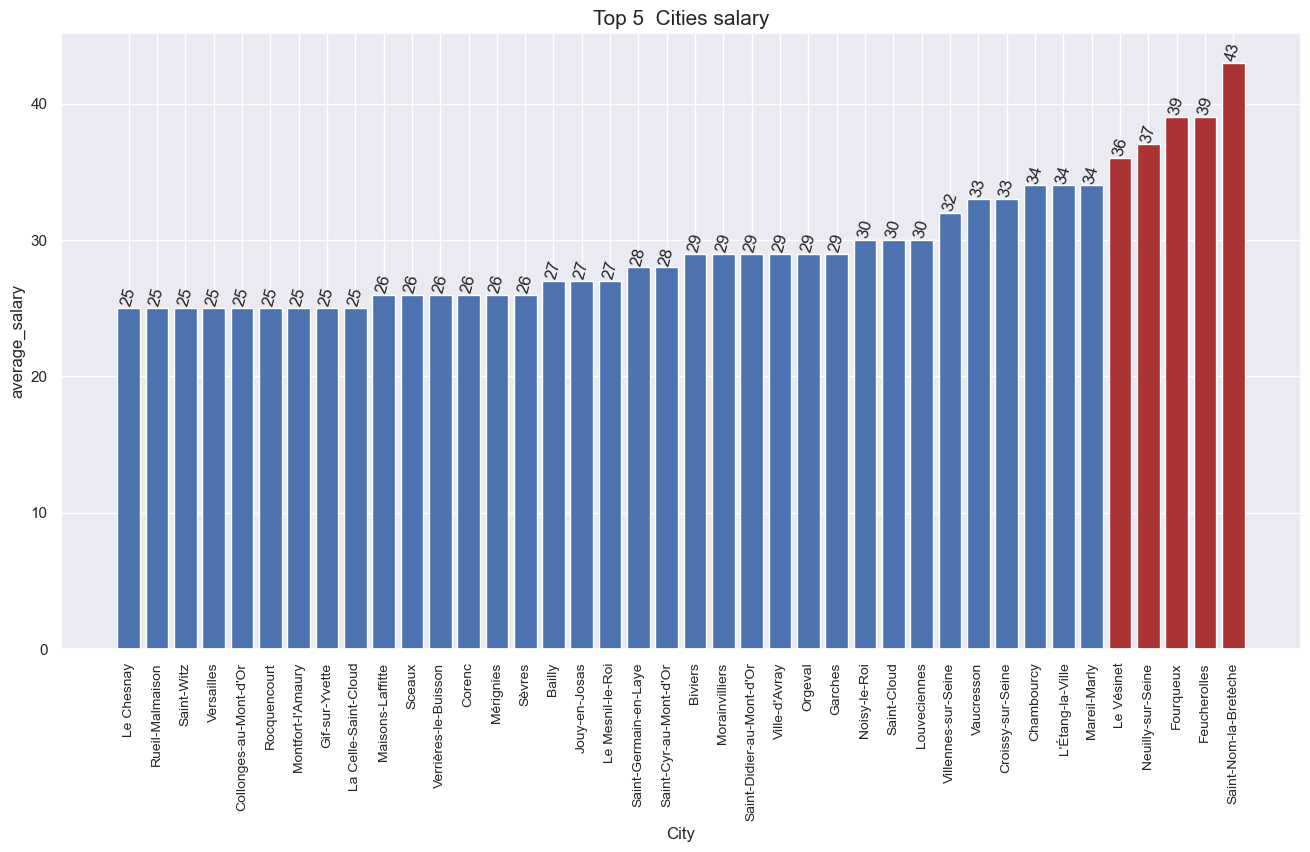

In [13]:
all_cities_with_high_salary = french_industry.groupby('City')[['average_salary','Total_business']].mean().round().sort_values(by='average_salary', ascending = False)[:40]
all_cities_with_high_salary = all_cities_with_high_salary.reset_index()
sns.set()
best_5= barplot_Top_10_cities(all_cities_with_high_salary,'City','average_salary','City','average_salary',
                                5,'Top 5  Cities salary')

* Based on the previous bar plot, it's evident that the city with the highest average salary is Saint-Nom-la-Bretèche, boasting an average salary of approximately 43.0 euros per hour. Following closely is Feucherolles, succeeded by Fourqueux, Neuilly-sur-Seine, and Le Vésinet, all with average salaries around 39.0 and 36.0 euros per hour. Notably, these cities are recognized as affluent communes in France, with some of them situated in close proximity to the capital city.


In [14]:
reg_dep = french_industry.groupby("REG")[["average_salary","Total_business"]].mean().round(2).sort_values(by = 'Total_business', ascending = False)
reg_dep.head()


,average_salary,Total_business
REG,,
4,12.32,2624.36
11,17.12,1850.36
3,14.21,1710.50
1,12.83,1612.72
2,12.94,1306.24


4) In the following boxplots the aim is to examine the distribution of the Average salary and number of total business regarding the top 5 cities in France with higher salaries.

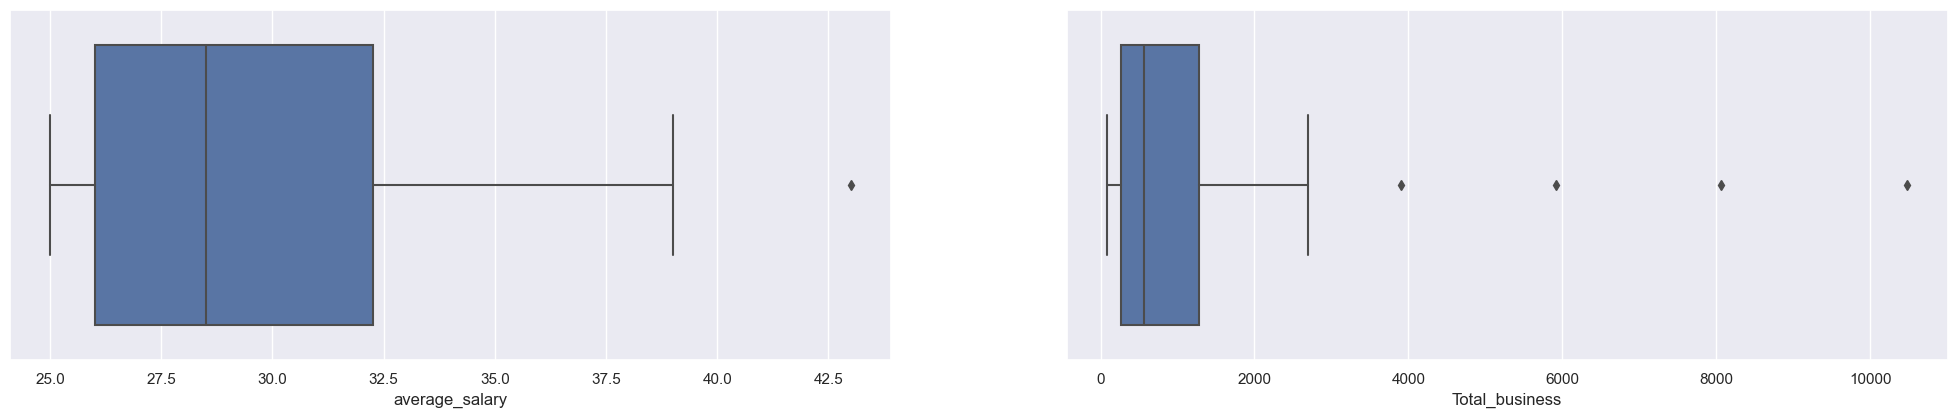

In [15]:
# Average salary and total businesses boxplots.

plt.figure(figsize = (25,10))

plt.subplot(221)
sns.boxplot(x = 'average_salary', data = all_cities_with_high_salary);

plt.subplot(222)
sns.boxplot(x = 'Total_business', data = all_cities_with_high_salary);

In [16]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(all_cities_with_high_salary['average_salary'],all_cities_with_high_salary['Total_business']),
             index = ['pearson_coeff','p-value'], columns = ['test_result'])

,test_result
pearson_coeff,-0.007385
p-value,0.963928


* Results:

1) There is no correlation between Average salary and number of business in the Top 5 cities with higher salaries in France.


* Observations:

- It is noticeable the numerous outliers in the Total Businesses data. This became evident when data description is examined, revealing a substantial disparity between the maximum and minimum values.

5) The purpose of the correlation heatmap is to rapidly identify potential relationships between all the variables included in the 'french_industry' dataframe.

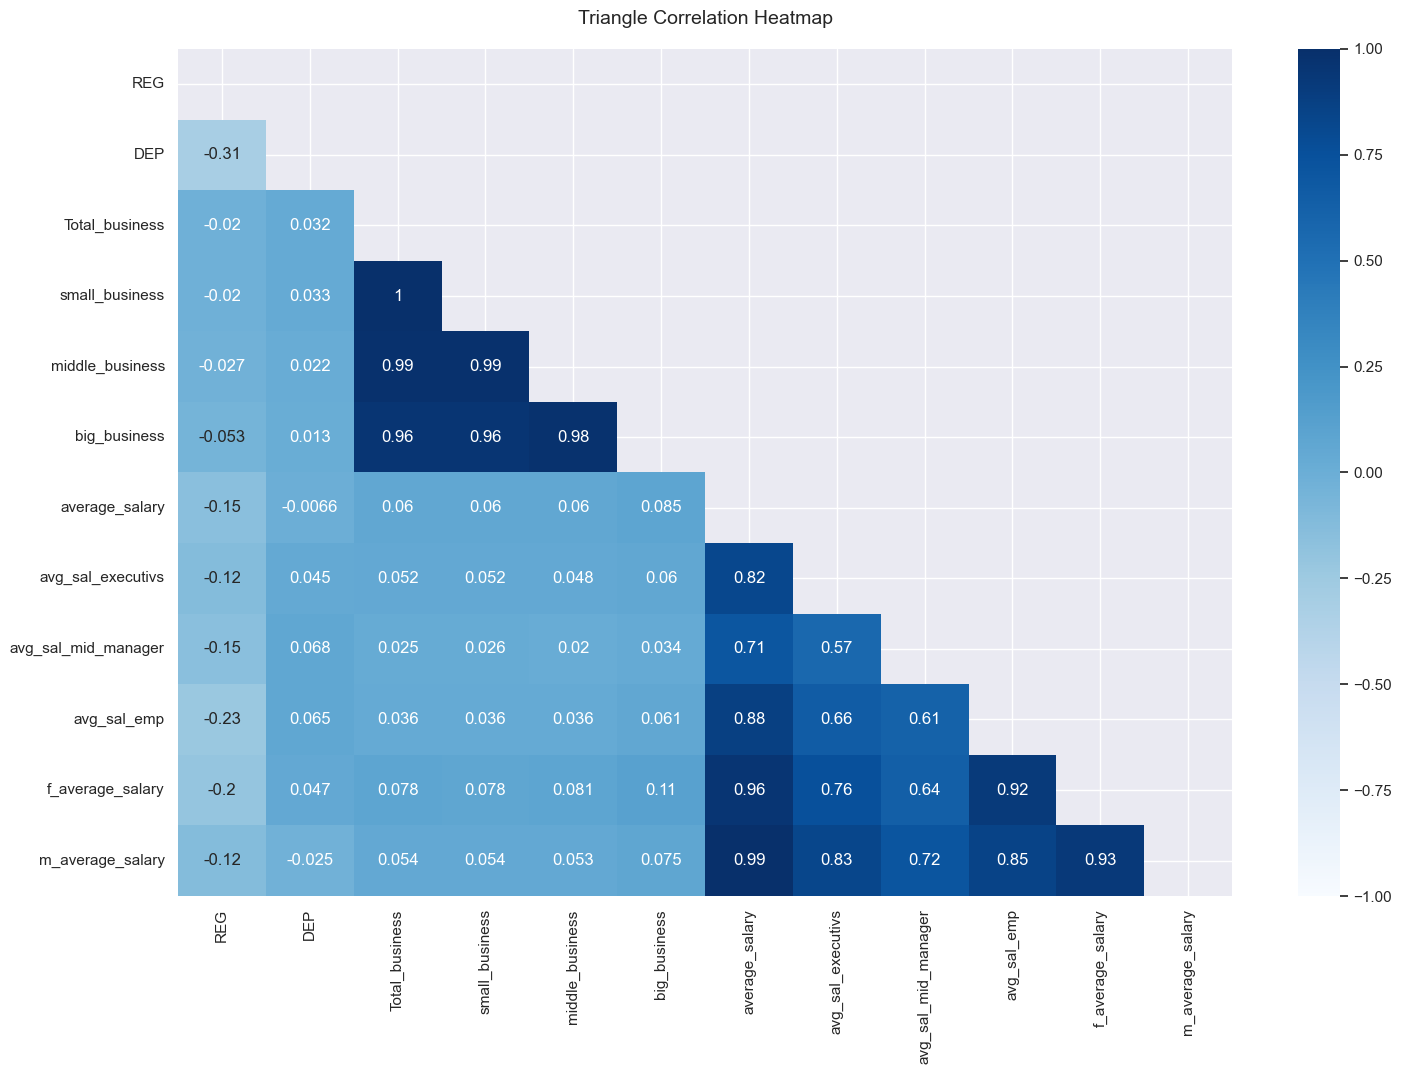

In [17]:
plt.figure(figsize=(17, 11))
mask = np.triu(np.ones_like(french_industry.select_dtypes(include = ['int', 'float']).corr()))
heatmap = sns.heatmap(french_industry.select_dtypes(include = ['int', 'float']).corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=18);

* Results:

1) No significant correlations among the variables of interest were discovered.

6) A lineplot is created to visually represent the gender-based salary inequality across regions in France.

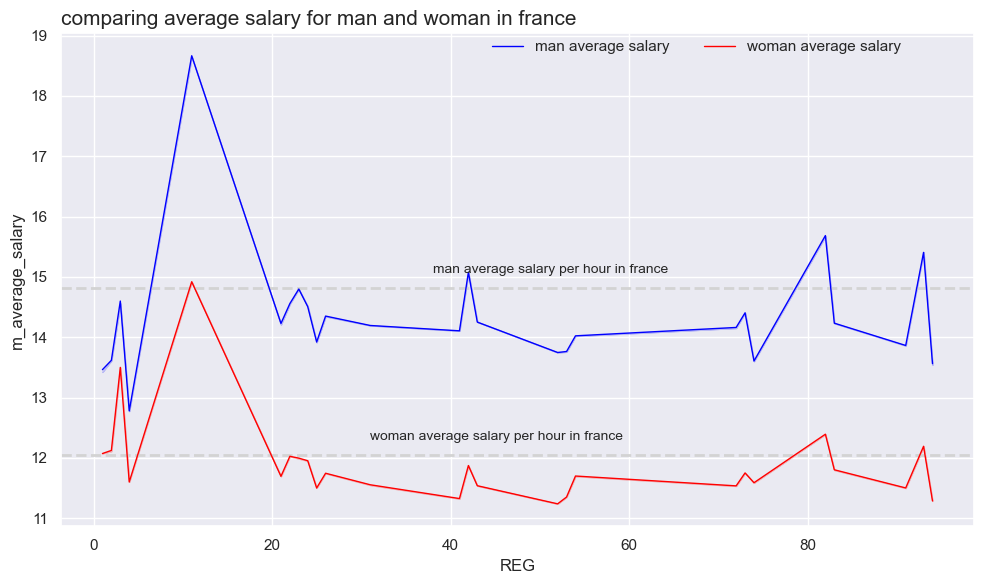

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.set(style='whitegrid')
    
plt.axhline(y=round(french_industry['f_average_salary'].mean(), 2),linestyle='--', color = 'lightgray', lw=2)
plt.axhline(y=round(french_industry['m_average_salary'].mean(), 2),linestyle='--', color = 'lightgray', lw=2)
sns.lineplot(x='REG', y='m_average_salary', data=french_industry\
              ,errorbar=('ci', 0), color = 'blue', linewidth=1, label = 'man average salary ',ax=ax)

sns.lineplot(x='REG', y='f_average_salary', data=french_industry\
              ,errorbar=('ci', 0), color = 'red', linewidth=1, label = 'woman average salary ', ax=ax)


plt.title("comparing average salary for man and woman in france",
          loc='left', fontsize = 15)

plt.text(31,french_industry['f_average_salary'].mean()+.25, 'woman average salary per hour in france', size=10)
plt.text(38,french_industry['m_average_salary'].mean()+.25, 'man average salary per hour in france',size=10)

plt.legend(ncol=2, bbox_to_anchor=(.94, .93), loc="lower right", frameon=False)
plt.tight_layout()

* Results: 

1) The average salary for men is higher than that for women.

2) The average salary for men is approximately 14 euros per hour, while the average salary for women is about 12 euros per hour, indicating a significant difference.

3) The maximum women's average salary is nearly equivalent to the men's average salary, whereas the maximum men's average salary reaches around 18.6 euros per hour.

* Observations:

- It's important to recall that the maximum value of the average salary is considered an outlier. This is due to the presence of certain communes where the average salary figures are exceptionally high. These communes are characterized by their substantial wealth.

In [19]:
average_salary_women = french_industry['f_average_salary'].mean()
average_salary_men = french_industry['m_average_salary'].mean()

# Calculate the gender wage gap
gender_wage_gap = ((average_salary_men - average_salary_women) / average_salary_men) * 100

print("Gender Wage Gap: {:.2f}%".format(gender_wage_gap))

Gender Wage Gap: 18.73%


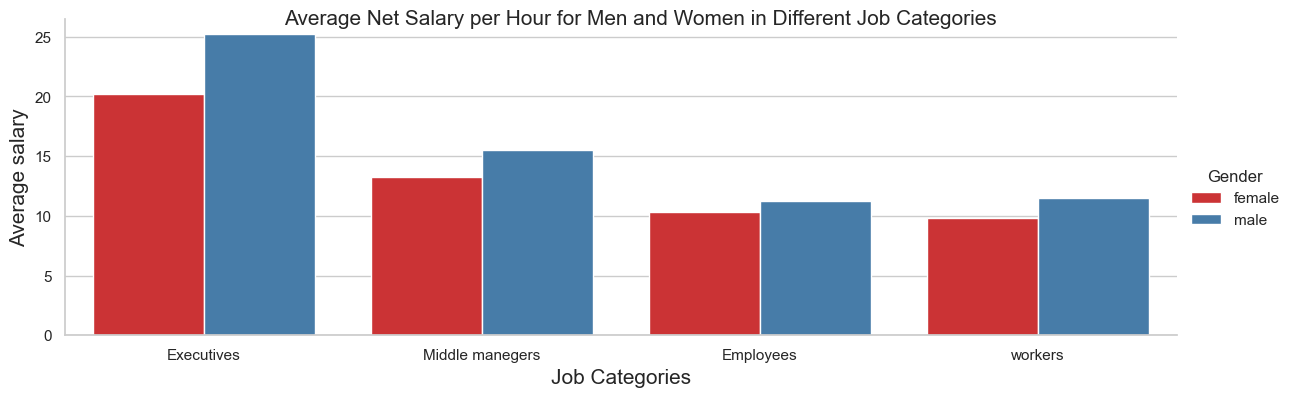

In [20]:
# Average Net Salary per Hour for Men and Women in Different Job Categories and cohabitation mode:

df3_2 = pd.read_csv('desktop/data/french_industry-2/net_salary_per_town_categories.csv')
cat_job = df3_2[["SNHMFC14", "SNHMFP14", "SNHMFE14", "SNHMFO14","SNHMHC14", "SNHMHP14", "SNHMHE14", "SNHMHO14"]].mean().to_frame()
cat_job.columns = ["Average_salary"]
cat_job = cat_job.set_index("Average_salary")
cat_job= cat_job.reset_index()
cat_job["Gender"] = ["female","female","female","female","male","male","male","male",]
cat_job["Job_Categories"] = ["Executives" ,"Middle manegers","Employees","workers","Executives" ,"Middle manegers","Employees","workers"]
sns.set(style='whitegrid')
#with plt.style.context('fivethirtyeight'):
sns.catplot(x = 'Job_Categories', y = 'Average_salary', hue = 'Gender', kind = 'bar', height = 4, aspect = 3,
            palette = "Set1",
            data = cat_job).fig.suptitle("Average Net Salary per Hour for Men and Women in Different Job Categories",fontsize=15);
plt.xlabel('Job Categories', fontsize=15)
plt.ylabel('Average salary', fontsize=15)
plt.show()

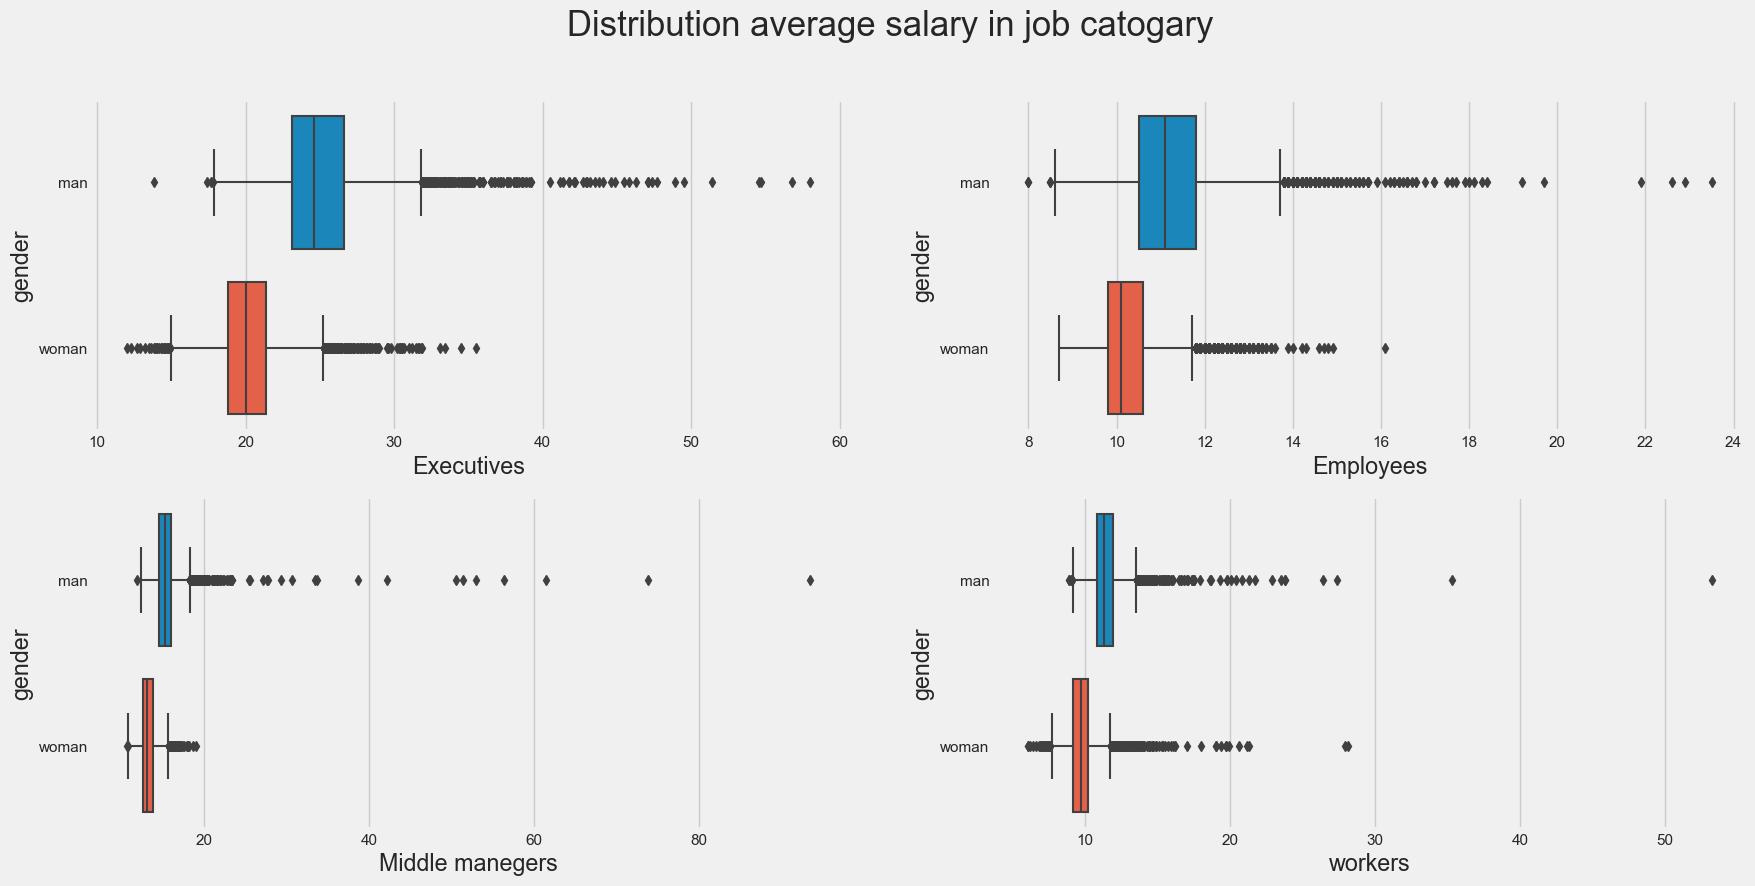

In [21]:
age_job_w = df3_2.loc[:,["SNHMFC14", "SNHMFP14", "SNHMFE14", "SNHMFO14"]]
age_job_w.columns = ["Executives" ,"Middle manegers","Employees","workers"]
age_job_w['gender'] = "woman"
age_job_m = df3_2.loc[:,["SNHMHC14", "SNHMHP14", "SNHMHE14", "SNHMHO14"]]
age_job_m.columns = ["Executives" ,"Middle manegers","Employees","workers"]
age_job_m['gender'] = "man"
df_m_w = pd.concat([age_job_m,age_job_w ], axis = 0)

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots (2,2 , figsize = (19,9))
    sns.boxplot(x="Executives", data= df_m_w,y="gender", linewidth=1.5, ax=ax[0,0])
    sns.boxplot (x= "Middle manegers", data= df_m_w,y="gender", linewidth=1.5, ax=ax[1,0])
    sns.boxplot (x= "Employees", data= df_m_w,y="gender", linewidth=1.5,ax=ax[0,1])
    sns.boxplot (x= "workers", data= df_m_w,y="gender", linewidth=1.5,ax=ax[1,1])
fig.suptitle("Distribution average salary in job catogary", fontsize = 25)
plt.show()

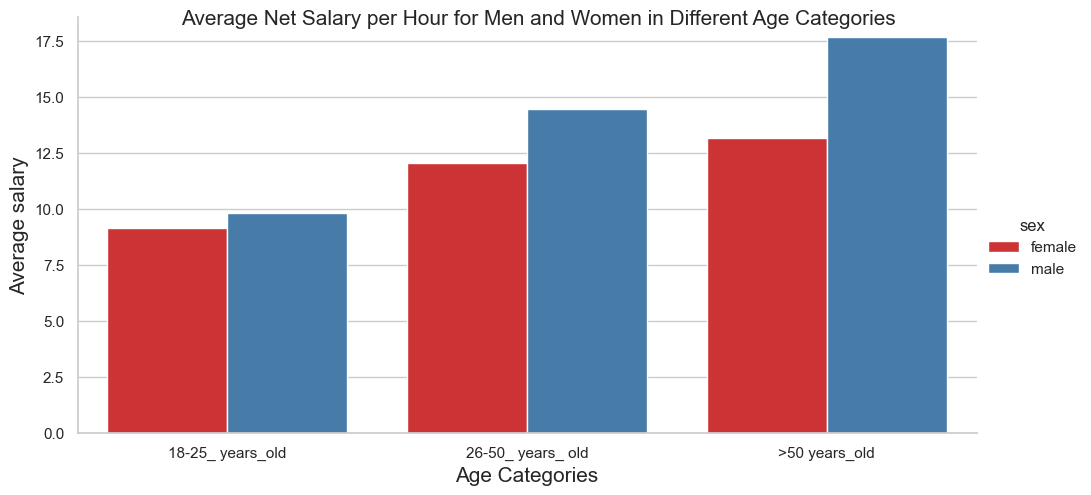

In [22]:
# Average Net Salary per Hour for Men and Women in Different age Categories :

age_job = df3_2[["SNHMF1814", "SNHMF2614", "SNHMF5014","SNHMH1814", "SNHMH2614", "SNHMH5014"]].mean().to_frame()
age_job.columns = ["average_salary"]
age_job = age_job.set_index("average_salary")
age_job= age_job.reset_index()
age_job["sex"] = ["female","female","female","male","male","male",]
age_job["Age_Categories"] = ["18-25_ years_old" ,"26-50_ years_ old",">50 years_old","18-25_ years_old" ,"26-50_ years_ old",">50 years_old"]

sns.set(style='whitegrid')

sns.catplot(x = 'Age_Categories', y = 'average_salary', hue = 'sex', kind = 'bar', height = 5, aspect = 2,
            palette = "Set1",
            data = age_job).fig.suptitle("Average Net Salary per Hour for Men and Women in Different Age Categories",fontsize=15);
plt.xlabel('Age Categories', fontsize=15)
plt.ylabel('Average salary', fontsize=15)
plt.show()

In [23]:
salary = pd.read_csv('desktop/data/french_industry-2/net_salary_per_town_categories.csv')
salary.head()
f_jo = salary[["SNHMFC14", "SNHMFP14", "SNHMFE14", "SNHMFO14"]]
f_jo= f_jo.rename({"SNHMFC14": "Executives", "SNHMFP14": "Middle manegers","SNHMFE14":"Employees","SNHMFO14":"workers"}, axis = 1)
f_jo=f_jo.stack().reset_index()
f_jo["Gender"] = 0
m_jo = salary[["SNHMHC14", "SNHMHP14", "SNHMHE14", "SNHMHO14"]]
m_jo= m_jo.rename({"SNHMHC14": "Executives", "SNHMHP14": "Middle manegers","SNHMHE14":"Employees","SNHMHO14":"workers"}, axis = 1)
m_jo=m_jo.stack().reset_index()
m_jo["Gender"] = 1
m_f_salary = pd.concat([f_jo,m_jo] , axis = 0)
m_f_salary=m_f_salary.rename({"level_1":"job_cat", 0:"average_salary"}, axis= 1)
m_f_salary= m_f_salary.drop(["level_0"], axis = 1)

f_ag = salary[["SNHMF1814", "SNHMF2614", "SNHMF5014"]]
f_ag= f_ag.rename({"SNHMF1814": "18_25", "SNHMF2614": "26_50","SNHMF5014":">50"}, axis = 1)
f_ag=f_ag.stack().reset_index()
f_ag["Gender"] = 0
m_ag = salary[["SNHMH1814", "SNHMH2614", "SNHMH5014"]]
m_ag= m_ag.rename({"SNHMH1814": "18_25", "SNHMH2614": "26_50","SNHMH5014":">50"}, axis = 1)
m_ag=m_ag.stack().reset_index()
m_ag["Gender"] = 1
m_f_salary2 = pd.concat([f_ag,m_ag] , axis = 0)
m_f_salary2=m_f_salary2.rename({"level_1":"age", 0:"average_salary"}, axis= 1)
m_f_salary2= m_f_salary2.drop(["level_0"], axis = 1)
salary_df= m_f_salary.merge(right=m_f_salary2 , on = ["Gender","average_salary"], how = 'inner')

In [24]:
salary_df.head()

,job_cat,average_salary,Gender,age
0,Executives,19.1,0,>50
1,Executives,19.1,0,>50
2,Executives,19.1,0,>50
3,Executives,19.1,0,26_50
4,Executives,19.1,0,>50


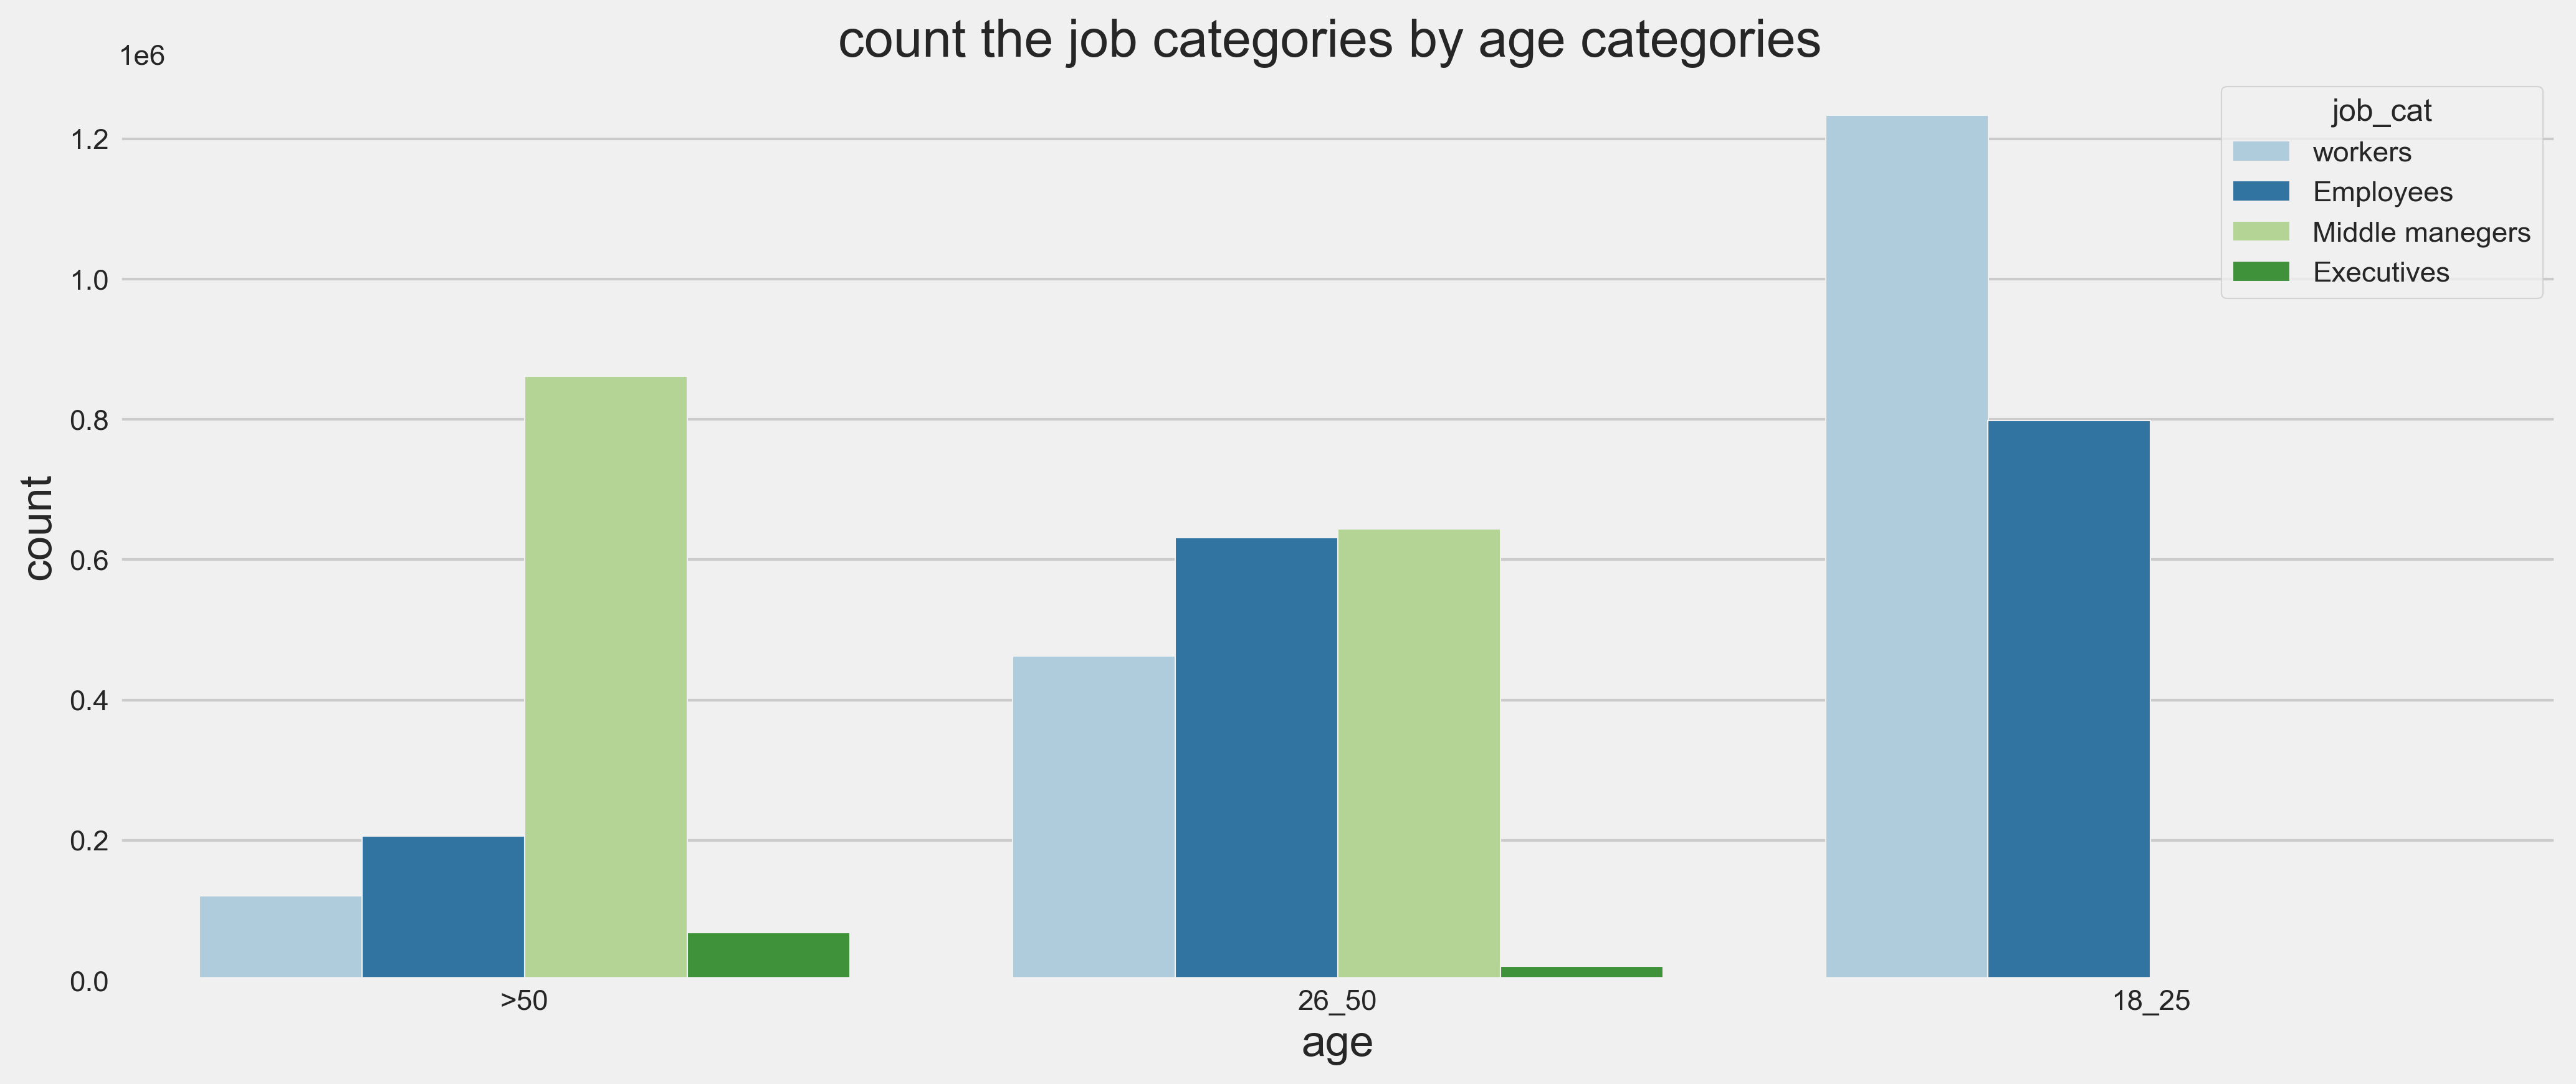

In [25]:
with plt.style.context('fivethirtyeight'):
    sns.set_palette("Paired")
    
    plt.figure(figsize=(15, 6), dpi=300)
    sns.countplot(x= 'age', 
                  hue="job_cat",
                  hue_order=salary_df["job_cat"].value_counts().index, 
                  data=salary_df,
                 palette = "Paired")
    plt.title("count the job categories by age categories ")
    plt.show()

# Creation of the new 'sal_location' dataframe.

In [26]:
# Merging df1, df2, and df3 dataframes.

from functools import reduce
dfs = [df2,df4,df3]
sal_location= reduce(lambda  left,right: pd.merge(left,right,on=['LIBGEO'],how='inner'), dfs)
sal_location= sal_location.rename({"LIBGEO":"City" } ,  axis = 1 )
sal_location= sal_location.drop_duplicates(keep = "first")
#salary_place = salary_place.dropna()
sal_location.head()

,code_région,City,latitude,longitude,éloignement,NIVGEO,CODGEO,Individual_stu,Age,Gender,NB,average_salary,avg_sal_executivs,avg_sal_mid_manager,avg_sal_emp,f_average_salary,m_average_salary
0,82,Lyon,46.283333,5.166667,1.21,COM,69123,11,0,1,13564,15.9,24.5,14.3,10.9,14.0,17.4
1,82,Lyon,46.283333,5.166667,1.21,COM,69123,11,0,2,12763,15.9,24.5,14.3,10.9,14.0,17.4
2,82,Lyon,46.283333,5.166667,1.21,COM,69123,11,5,1,9606,15.9,24.5,14.3,10.9,14.0,17.4
3,82,Lyon,46.283333,5.166667,1.21,COM,69123,11,5,2,9302,15.9,24.5,14.3,10.9,14.0,17.4
4,82,Lyon,46.283333,5.166667,1.21,COM,69123,11,10,1,7941,15.9,24.5,14.3,10.9,14.0,17.4


In [27]:
# Using the latitude variable, the goal is the creation of a new variable 'location' containing variables north_FR and Center_FR and south_FR.

result= []

for i in sal_location["latitude"]:
    if i > 48 :
        result.append("north_FR")
    elif (i < 48) & (i > 45):
        result.append("center_FR")
    else:
        result.append("south_FR")
        
sal_location["location"] = result     

In [28]:
 from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [29]:
salary = pd.read_csv('desktop/data/french_industry-2/net_salary_per_town_categories.csv')
salary.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


In [30]:
#sns.pairplot(df3_n[df3_n.columns[:26]]);

In [31]:
# drop the categories column we never need
salary = salary.drop(["CODGEO","LIBGEO"], axis = 1)

In [32]:
# i will see correlation between everage salary and other columns 
salary.corr()["SNHM14"].sort_values(ascending = False).to_frame()

,SNHM14
SNHM14,1.000000
SNHMH14,0.994432
SNHM2614,0.989733
SNHMH2614,0.982867
SNHM5014,0.976847
SNHMH5014,0.962515
SNHMF14,0.958000
SNHMF2614,0.951343
SNHMF5014,0.909135
SNHME14,0.880236


* from previous results we can say that data very easy to predict,  we can simply use linear regression ,for choosing predictor variable , i will choose variable with highest correlation.

In [33]:
# creating feats and target data

X = salary["SNHMH14"]

y = salary["SNHM14"]

In [34]:
# import our model 

from sklearn.linear_model import LinearRegression
X_ml = X.values.reshape(-1,1)
regressor = LinearRegression()

regressor.fit(X_ml,y) 


data = {"result":[regressor.coef_, regressor.intercept_]}
data = pd.DataFrame(data, index=["coef" , "intercept"])
data

,result
coef,[0.8015599432780627]
intercept,1.804673


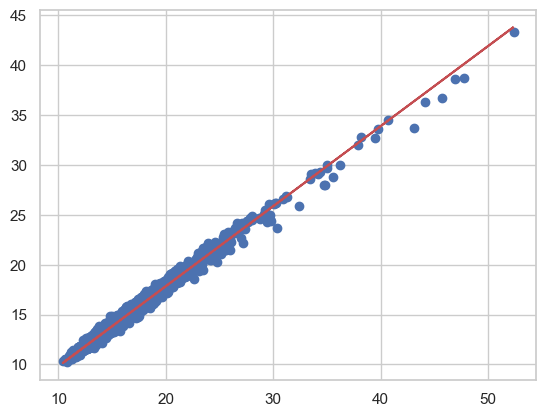

In [35]:
# Y = mX + b

plt.scatter(X,y)
y_hat = 0.80155994 * X + 1.8046725579501466
fig = plt.plot(X,y_hat,c = "r")
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [37]:
X_ml = X.values.reshape(-1,1)
reg = LinearRegression()

reg.fit(X_train.values.reshape(-1,1),y_train)
y_pred= regressor.predict(X_test.values.reshape(-1,1))

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [39]:
data2 = {'result': [mean_absolute_error(y_test, y_pred) , 
               mean_squared_error(y_test, y_pred),
               np.sqrt(mean_squared_error(y_test, y_pred)),
               np.mean(y_test),
               np.median(y_test),
               np.mean(y_pred),
               reg.score(X_train.values.reshape(-1,1),y_train) ,
               regressor.score(X_test.values.reshape(-1,1),y_test),
               r2_score(y_pred,y_test)]}
data_matrix = pd.DataFrame(data2 , index = ['MAE test','MSE test','RMSE test',"mean data test","median data test","mean data predict","reg score train","reg score test " , "R2"])
data_matrix


,result
MAE test,0.184289
MSE test,0.065616
RMSE test,0.256156
mean data test,13.649766
median data test,13.000000
mean data predict,13.651841
reg score train,0.989205
reg score test,0.987686
R2,0.987346


* Thus our model will predict average salaries with MAE and RMSE of 0.18 and 0.25 euro, respectively. for us this is normal becouse as we see in previous dataframe the mean of target data is about 13.0 . 

In [43]:
# here we will add more Variables to our model to make the it more complex and improve its performance 

target = salary["SNHM14"]
freats = salary[["SNHMH14", "SNHM2614","SNHMH2614","SNHM5014","SNHMH5014","SNHMF14","SNHMF2614"]]

In [44]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(freats, target, test_size=0.3, random_state = 42)

In [45]:
X_train_n.shape,X_test_n.shape,y_train_n.shape,y_test_n.shape

((3595, 7), (1541, 7), (3595,), (1541,))

In [46]:
from sklearn.linear_model import LinearRegression
reg_2 = LinearRegression()

reg_2.fit(X_train_n, y_train_n) 
predection = reg_2.predict(X_test_n)

In [49]:
data2 = {'result': [mean_absolute_error(y_test_n, predection) , 
               mean_squared_error(y_test_n, predection),
               np.sqrt(mean_squared_error(y_test_n, predection)),
               np.mean(y_test_n),
               np.mean(predection),
               reg_2.score(X_train_n, y_train_n) ,
               reg_2.score(X_test_n,y_test_n),
               r2_score(predection,y_test_n)]}
data_matrix2 = pd.DataFrame(data2 , index = ['MAE test','MSE test','RMSE test',"mean data test","mean data predict","reg score train","reg score test " , "R2"])
data_matrix2

,result
MAE test,0.042868
MSE test,0.002970
RMSE test,0.054502
mean data test,13.627060
mean data predict,13.629584
reg score train,0.999557
reg score test,0.999417
R2,0.999418


* as expected, more variables give us better score Accuracy than using one variable  

* In general this data has a strong linear Relationship, that is why using Machine Learning Models to predict average salary its was very easy , but our model will work very good only on real-world data which have same degree of complextiy and the same pattren , Otherwise it will make alot of mistakes .. 

# OLS model from statsmodels library 

In [55]:
import statsmodels.api as sm

In [56]:
X_stats = sm.add_constant(X)
reg_stats = sm.OLS(y , X_stats).fit()

In [60]:
reg_stats.params

const      1.804673
SNHMH14    0.801560
dtype: float64

* Note : the const is intercept and  SNHMH14 is not variable SNHMH14 , but it is coef , but OLS Model used name of predictor variable to tell us , this value have a relationship with the Predictor variable

In [58]:
reg_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SNHM14   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 4.572e+05
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:56:27   Log-Likelihood:                -556.84
No. Observations:                5136   AIC:                             1118.
Df Residuals:                    5134   BIC:                             1131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8047      0.018    100.258      0.000       1.769       1.840
SNHMH14        0.8016      0.001    676.142      0.000       0.799       0.804
==============================================================================
Omnibus:                      762.968   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9166.165
Skew:                          -0.294   Prob(JB):                         0.00
Kurtosis:                       9.518   Cond. No.                         72.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* from the previous summary table we can notice the OLS Model from statsmodels library give same results as linearregression from sklearn library did , same coaf and intercept , the (P >t) value as we see its (0.000) that is mean the model have good performance and the valuse of (const & SNHMH14) is significant of predictive value , becouse the value of (P) smallest than 0.50 

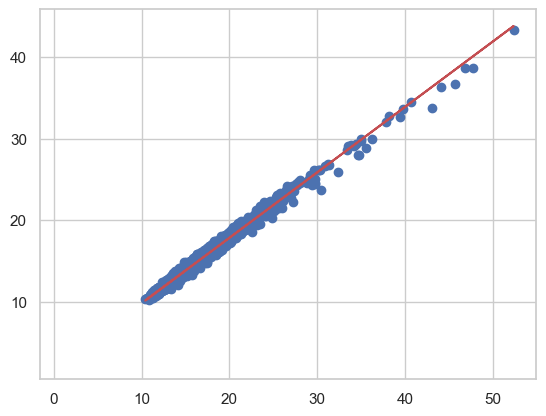

In [59]:
plt.scatter(X,y)
y_hat = 0.801560 * X_stats + 1.804673
fig = plt.plot(X_stats,y_hat,c = "r")
plt.show()

In [47]:
salary_df

,job_cat,average_salary,Gender,age
0,Executives,19.1,0,>50
1,Executives,19.1,0,>50
2,Executives,19.1,0,>50
3,Executives,19.1,0,26_50
4,Executives,19.1,0,>50
...,...,...,...,...
5048897,Executives,39.2,1,>50
5048898,Executives,39.2,1,26_50
5048899,Executives,38.4,1,>50
5048900,Executives,37.1,1,26_50


In [47]:
salary_df = salary_df.replace(to_replace=['Executives','Middle manegers','workers','Employees'], value= [3,2,0,1])
salary_df = salary_df.replace(to_replace=['>50','26_50','18_25'], value= [0,1,2])

In [48]:
feats = salary_df.drop('average_salary', axis=1)

target = salary_df['average_salary']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state = 42)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

num = ['job_cat', 'Gender', 'age']

X_train[num] = sc.fit_transform(X_train[num])

X_test[num] = sc.transform(X_test[num])

In [51]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state=42) 
  
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))

print(regressor.score(X_test, y_test))

0.9024362840007863
0.9024949348982368


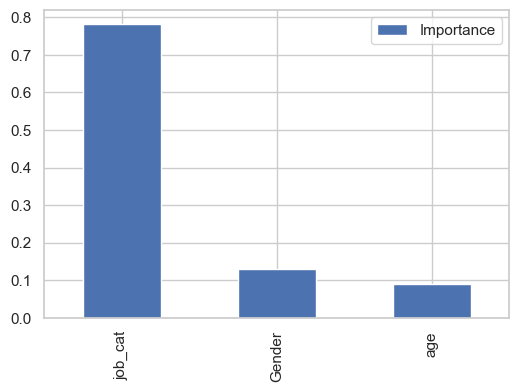

In [52]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(regressor.feature_importances_, index=feats.columns, columns=["Importance"])

feat_importances.sort_values(by='Importance', ascending=False, inplace=True )

feat_importances.plot(kind='bar', figsize=(6,4))

plt.show()

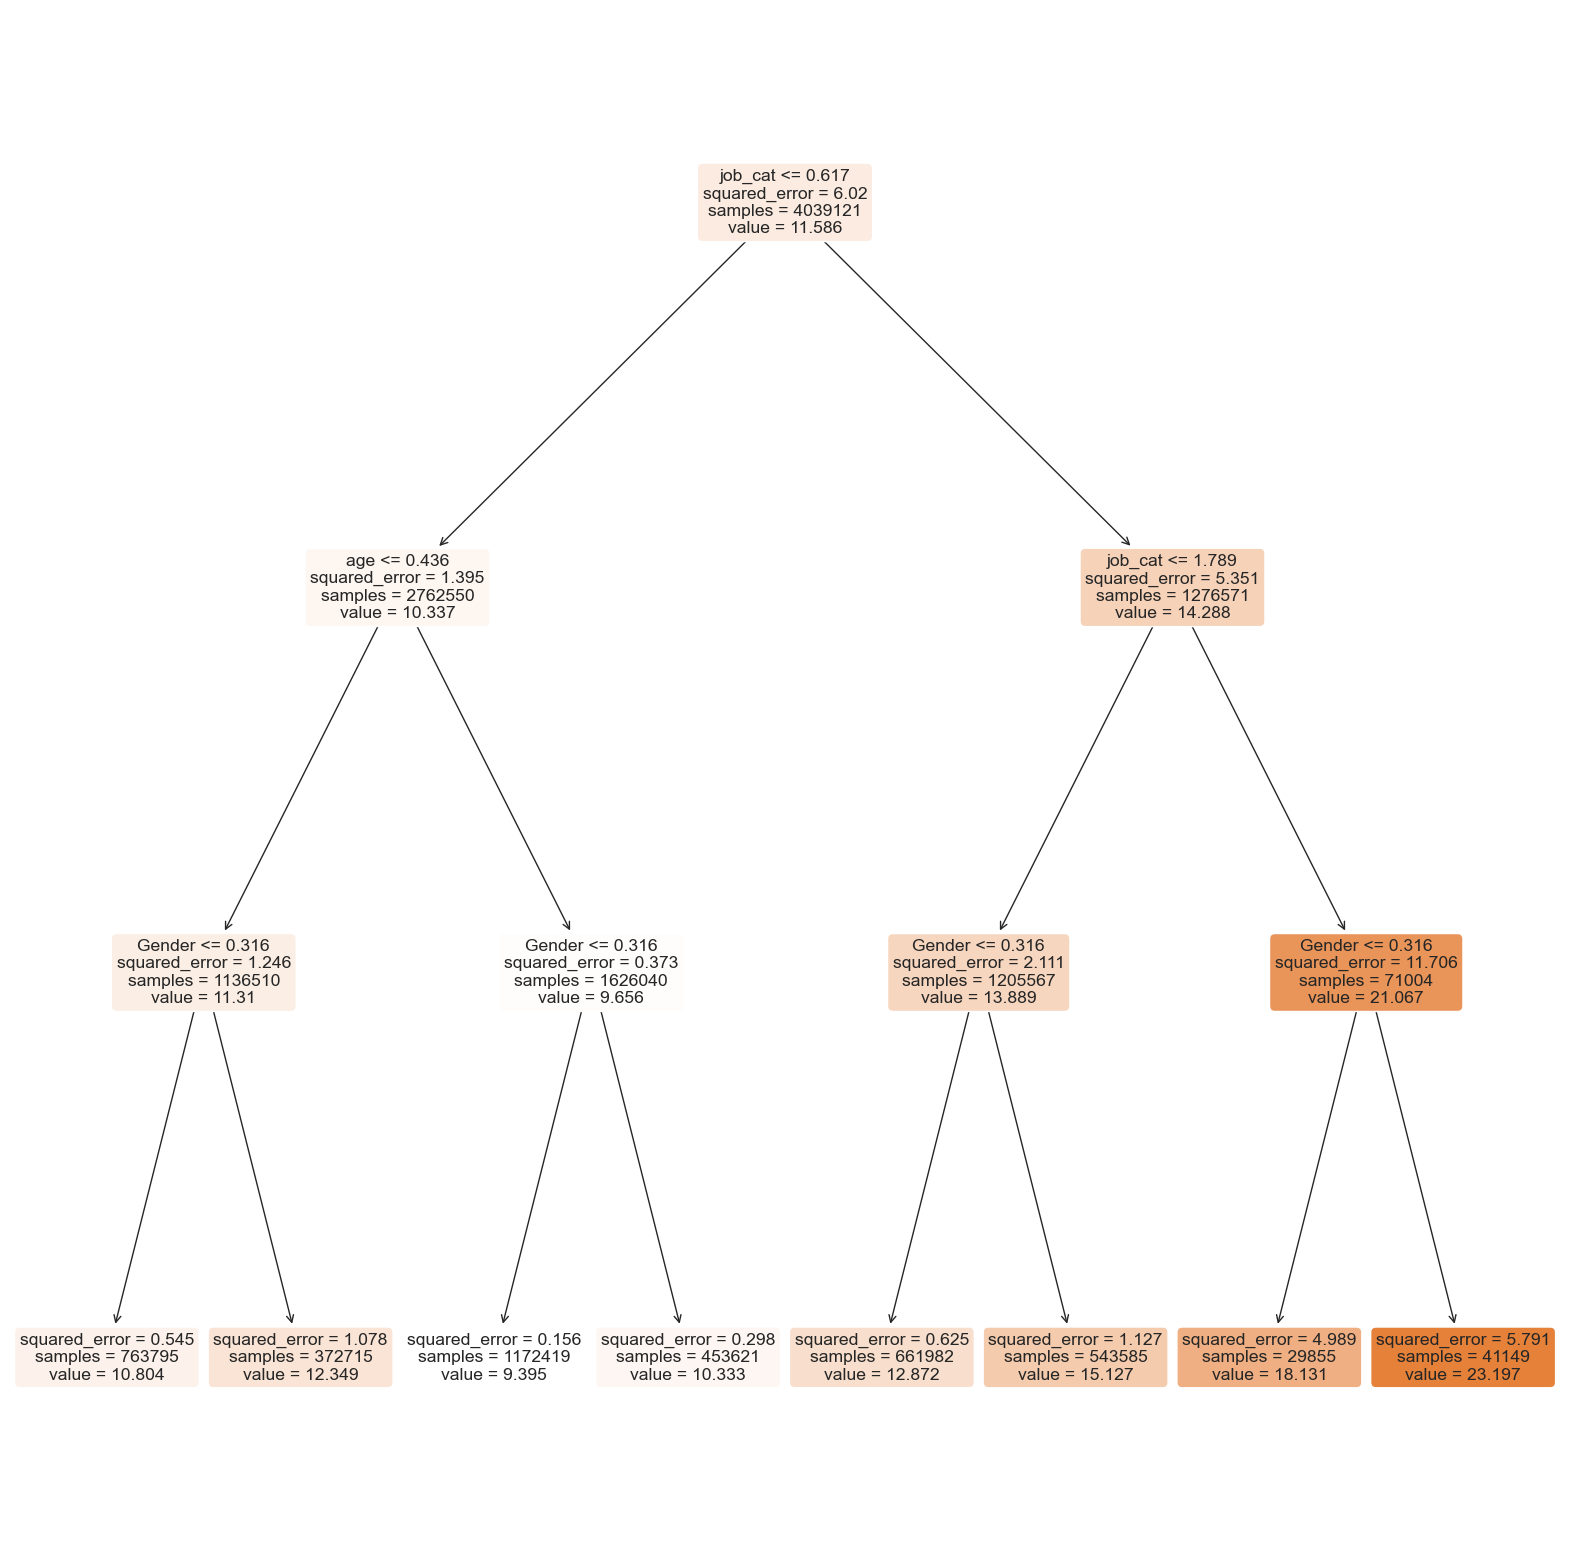

In [53]:
from sklearn.tree import plot_tree # tree diagram


regressor = DecisionTreeRegressor(random_state=42, max_depth = 3) 
  
regressor.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(regressor, 
          feature_names =num , 
          filled = True, 
          rounded = True)

plt.show()

In [62]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=42)

regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))

print(regressor.score(X_test, y_test))

0.9024359924514025
0.9024954788354839


In [63]:
### DecisionTree

regressor_decision_tree = DecisionTreeRegressor(random_state=42)

regressor_decision_tree.fit(X_train, y_train)

y_pred_decision_tree = regressor_decision_tree.predict(X_test)
y_pred_train_decision_tree = regressor_decision_tree.predict(X_train)

# Metrics

# Training set
mae_decision_tree_train = mean_absolute_error(y_train,
                                              y_pred_train_decision_tree)
mse_decision_tree_train = mean_squared_error(y_train,
                                             y_pred_train_decision_tree,
                                             squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,
                                              y_pred_train_decision_tree,
                                              squared=False)

# Test set
mae_decision_tree_test = mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree_test = mean_squared_error(y_test,
                                            y_pred_decision_tree,
                                            squared=True)
rmse_decision_tree_test = mean_squared_error(y_test,
                                             y_pred_decision_tree,
                                             squared=False)

### RandomForest

regressor_random_forest = RandomForestRegressor(random_state=42)

regressor_random_forest.fit(X_train, y_train)

# Metrics

y_pred_random_forest = regressor_random_forest.predict(X_test)
y_pred_random_forest_train = regressor_random_forest.predict(X_train)

# Training set

mae_random_forest_train = mean_absolute_error(y_train,
                                              y_pred_random_forest_train)
mse_random_forest_train = mean_squared_error(y_train,
                                             y_pred_random_forest_train,
                                             squared=True)
rmse_random_forest_train = mean_squared_error(y_train,
                                              y_pred_random_forest_train,
                                              squared=False)

# Test set

mae_random_forest_test = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest_test = mean_squared_error(y_test,
                                            y_pred_random_forest,
                                            squared=True)
rmse_random_forest_test = mean_squared_error(y_test,
                                             y_pred_random_forest,
                                             squared=False)

# Creation of a dataframe to compare the metrics of the two algorithms

data = {
    'MAE train': [mae_decision_tree_train, mae_random_forest_train],
    'MAE test': [mae_decision_tree_test, mae_random_forest_test],
    'MSE train': [mse_decision_tree_train, mse_random_forest_train],
    'MSE test': [mse_decision_tree_test, mse_random_forest_test],
    'RMSE train': [rmse_decision_tree_train, rmse_random_forest_train],
    'RMSE test': [rmse_decision_tree_test, rmse_random_forest_test]
}

# DataFrame

df = pd.DataFrame(data, index=['Decision Tree', 'Random Forest '])

df.head()

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test
Decision Tree,0.525096,0.525023,0.587342,0.586726,0.766382,0.765980
Random Forest,0.525101,0.525026,0.587344,0.586722,0.766384,0.765978


In [64]:
print(np.mean(y_test))

11.58560163045255


In [65]:
y_pred= regressor.predict(X_test)
print(np.mean(y_pred))

11.585736552527742
